In [2]:
# Unzip the dataset zip file
!unzip /content/diabetes_prediction_dataset.csv.zip

Archive:  /content/diabetes_prediction_dataset.csv.zip
  inflating: diabetes_prediction_dataset.csv  


In [120]:
# Import all required libraries

# Data Loading & Pre processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import VotingClassifier

In [121]:
# Data Loading
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [122]:
# View top 5 data
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [123]:
# View last 5 data
df.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [124]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [125]:
# Check Data Is Cleaned or Not
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


<Axes: >

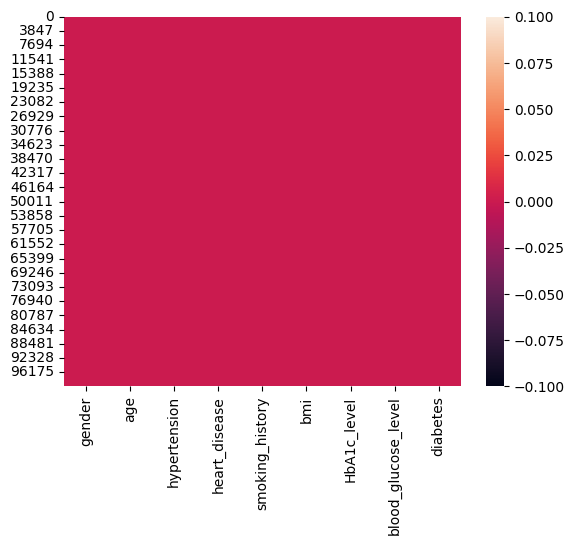

In [126]:
# Visualize clean data
sns.heatmap(df.isnull())

* Data Visualisation

In [127]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


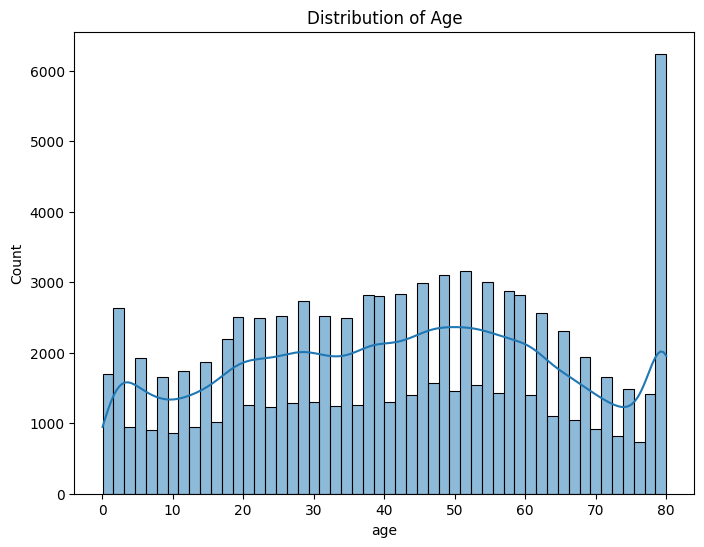

In [128]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

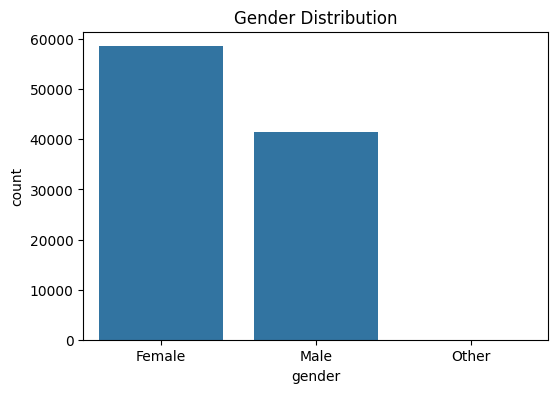

In [129]:
# Bar plot of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

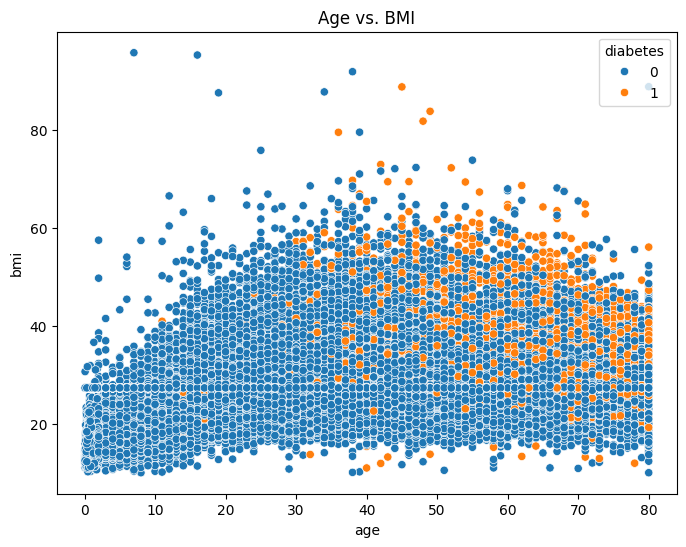

In [130]:
# Scatter plot of Age vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=df, hue='diabetes')
plt.title('Age vs. BMI')
plt.show()

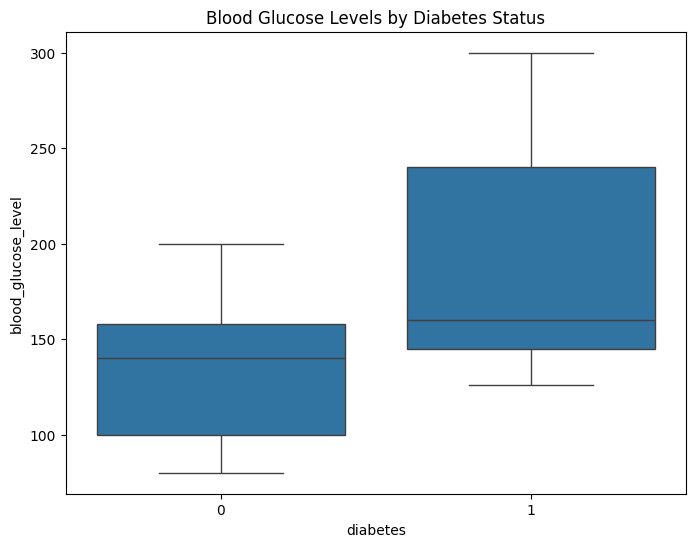

In [131]:
# Boxplot of Blood Glucose Levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.show()

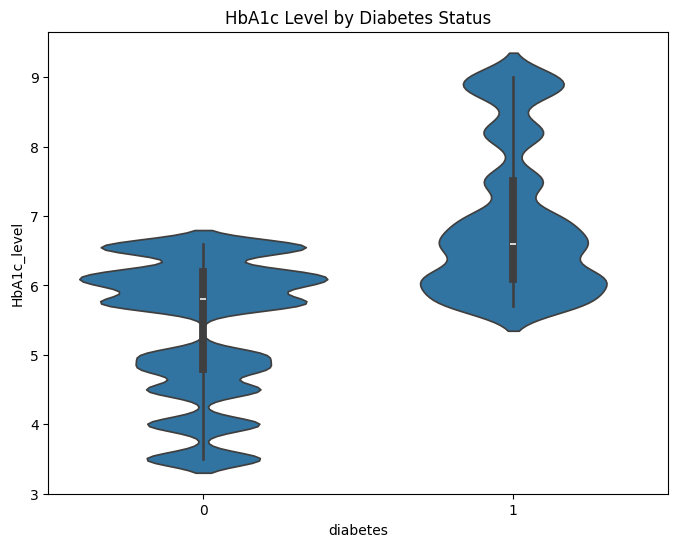

In [132]:
# Violin Plot of HbA1c Level
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c Level by Diabetes Status')
plt.show()

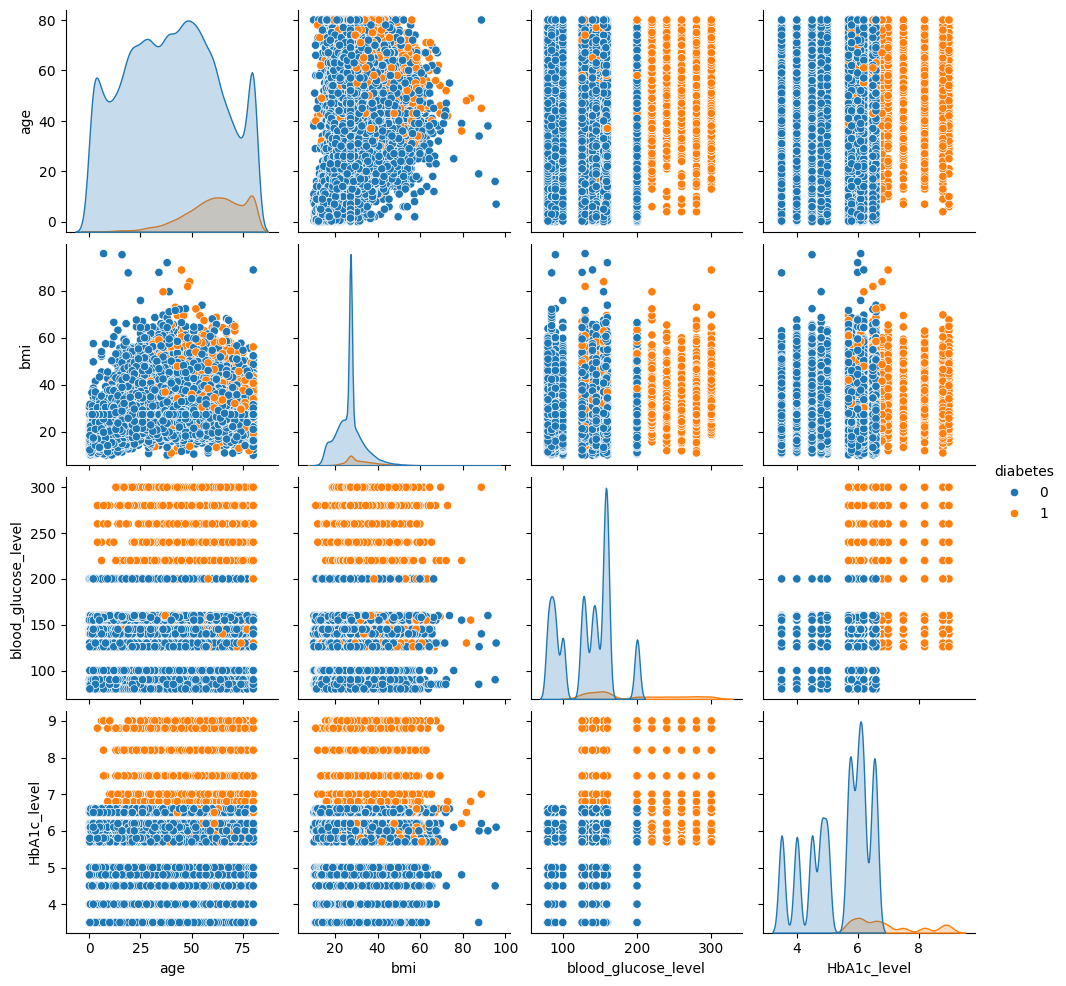

In [133]:
# Pairplot for selected features
sns.pairplot(df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'diabetes']], hue='diabetes')
plt.show()

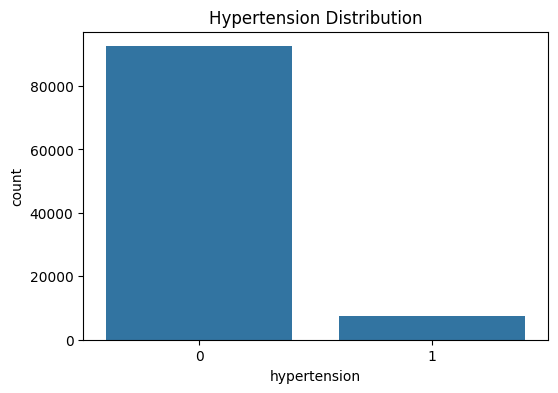

In [134]:
# Distribution of Hypertension
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')
plt.show()

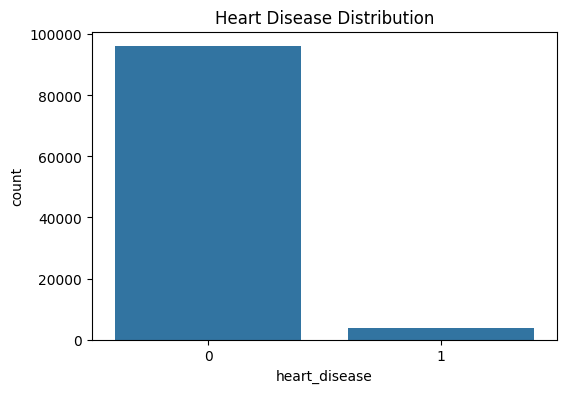

In [135]:
# Distribution of Heart Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

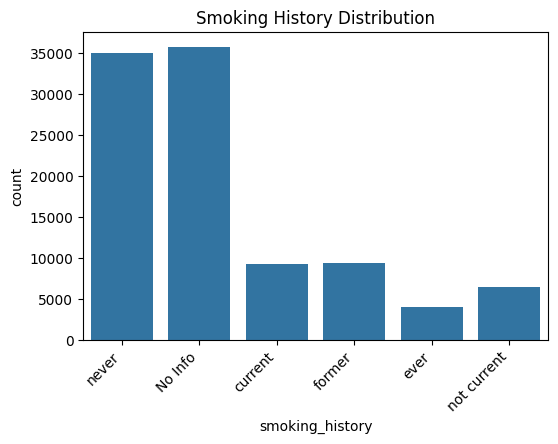

In [136]:
# Smoker distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

* Feature Engineering for model training and selection

In [137]:
# Handel object type columns

# Convert 'gender' to numerical values
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Convert 'smoking_history' to numerical values using one-hot encoding
smoking_history_dummies = pd.get_dummies(df['smoking_history'], prefix='smoking_history')
df = pd.concat([df, smoking_history_dummies], axis=1)
df = df.drop('smoking_history', axis=1)

In [138]:
# Split target and festure columns
X = df.drop('diabetes', axis=1)           # Features
y = df['diabetes']                        # Target

In [139]:
# Split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 13)
(20000, 13)
(80000,)
(20000,)


* Model Training

* Model - 1 Logistic Regression

In [141]:
# 1. Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)

In [142]:
# Fit training data to model
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [143]:
# Make prediction using trained model on testing data
logreg_pred = logreg_model.predict(X_test)

In [144]:
# Model Evaluation
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

Logistic Regression Accuracy: 0.9592


In [145]:
# Classification Report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.87      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



* Model - 2 Decision Tree Classifier

In [146]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier()

In [147]:
# Fit training data to model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [148]:
# Make prediction using trained model on testing data
dt_pred = dt_model.predict(X_test)

In [149]:
# Model Evaluation
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.9527


In [150]:
# Classification Report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



* Model - 3 Random Forest Classifier

In [151]:
# 3. Random Forest Classifier
rf_model = RandomForestClassifier()

In [152]:
# Fit training data to model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
# Make prediction using trained model on testing data
rf_pred = rf_model.predict(X_test)

In [154]:
# Model Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.97015


In [155]:
# Classification Report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



* Model - 4 Ensemble Model ( Combination of all above 3 models )

In [156]:
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', logreg_model), ('dt', dt_model), ('rf', rf_model)], voting='soft')

In [157]:
# Train the voting classifier
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [158]:
# Make predictions
voting_pred = voting_clf.predict(X_test)

In [159]:
# Evaluate the voting classifier
voting_accuracy = accuracy_score(y_test, voting_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

Voting Classifier Accuracy: 0.967


In [160]:
# Print Classification report
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.88      0.71      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.93      0.85      0.88     20000
weighted avg       0.97      0.97      0.97     20000



* Model Evaluation

ROC-AUC curve for each model to comapre the evaluation

In [161]:
# Predict probabilities for each model
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
ensemble_probs = voting_clf.predict_proba(X_test)[:, 1]

In [162]:
# Calculate ROC curves
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)

In [163]:
# Calculate AUC scores
logreg_auc = roc_auc_score(y_test, logreg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)

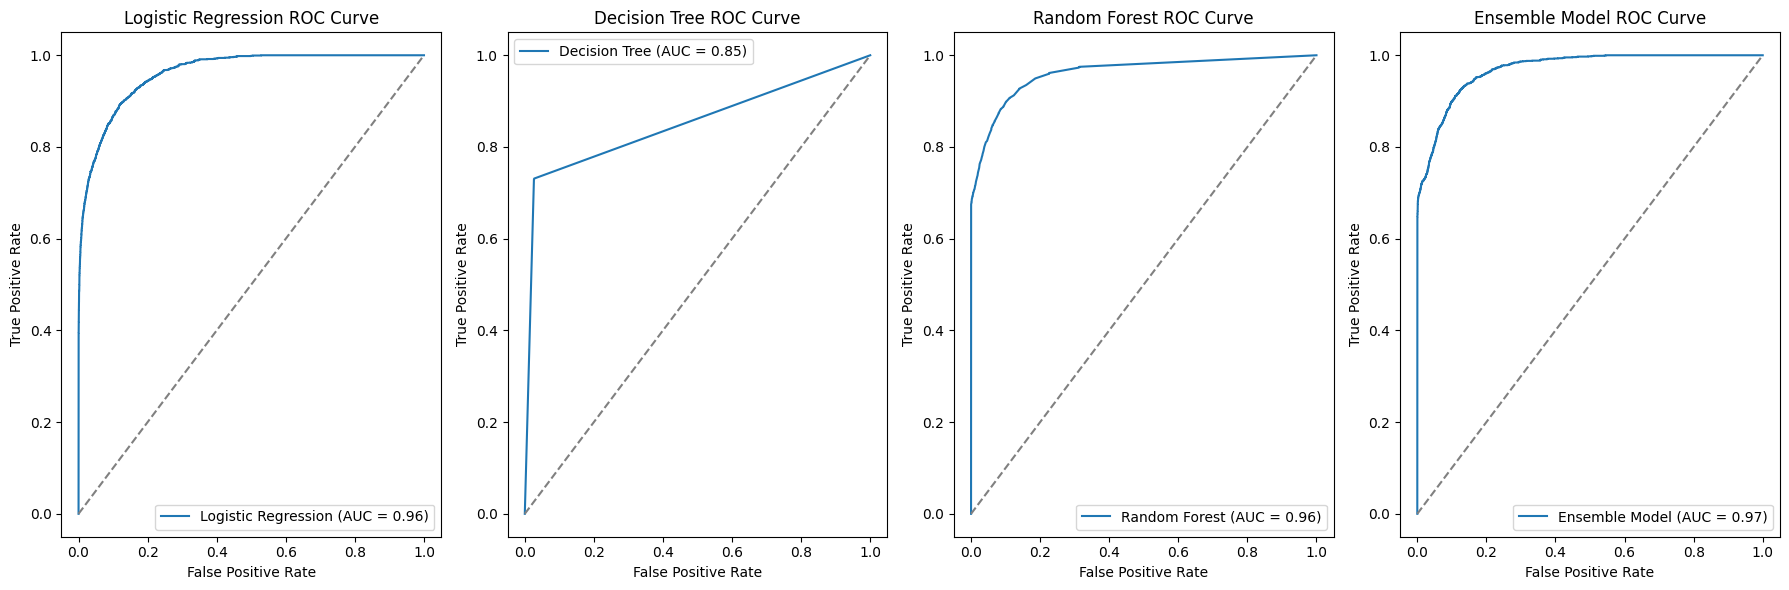

In [164]:
# Plot ROC curves in subplots
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()


plt.subplot(1, 4, 2)
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()

plt.subplot(1,4,4)
plt.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble Model (AUC = {ensemble_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble Model ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

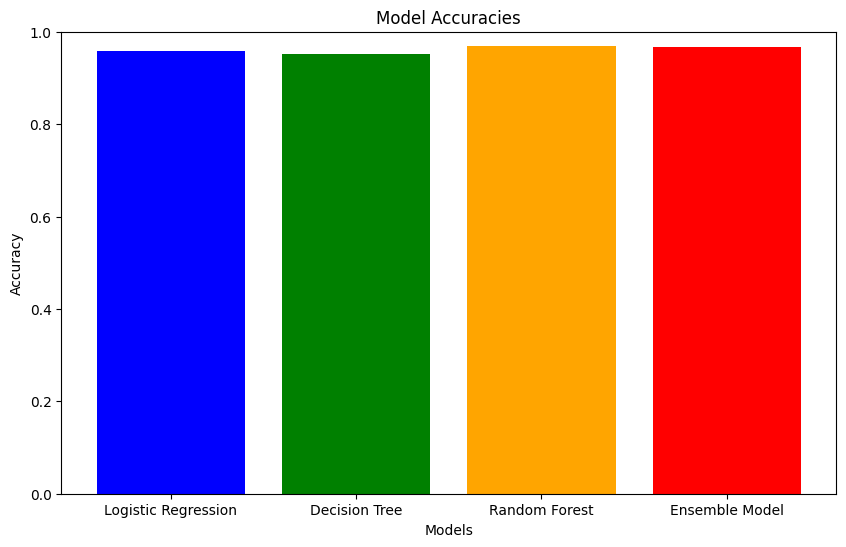

In [165]:
# Graph to show accuracy of all models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ensemble Model']
accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy, voting_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.show()

Make Prediction Using  Model to Compare the Actual & Predicted Values

In [175]:
import random
random_indices = random.sample(range(len(X_test)), 10)
for index in random_indices:
    prediction = rf_model.predict(X_test.iloc[[index]])
    actual_value = y_test.iloc[index]
    print(f"Index: {index}")
    print(f"Actual Value: {actual_value}")
    print(f"Predicted Value: {prediction[0]}")
    print("-" * 20)

Index: 14397
Actual Value: 1
Predicted Value: 1
--------------------
Index: 655
Actual Value: 0
Predicted Value: 0
--------------------
Index: 15707
Actual Value: 0
Predicted Value: 0
--------------------
Index: 10663
Actual Value: 0
Predicted Value: 0
--------------------
Index: 6152
Actual Value: 0
Predicted Value: 0
--------------------
Index: 13198
Actual Value: 0
Predicted Value: 0
--------------------
Index: 11449
Actual Value: 0
Predicted Value: 0
--------------------
Index: 5070
Actual Value: 0
Predicted Value: 0
--------------------
Index: 5309
Actual Value: 0
Predicted Value: 0
--------------------
Index: 484
Actual Value: 0
Predicted Value: 0
--------------------
